## Importing necessary libraries

In [639]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
import math
from sklearn.metrics import confusion_matrix
import seaborn as sb

## Loading dataset
The dataset is collected from kaggle.

Link: [World University Rankings 2023.csv](https://www.kaggle.com/datasets/alitaqi000/world-university-rankings-2023)

In [640]:
df = pd.read_csv('World University Rankings 2023.csv')
df.head()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


## Features and Target Variables

**Features:** Name of University ,Location, No of student,	No of student per staff,	International Student,	Female:Male Ratio,	OverAll Score,	Teaching Score,	Research Score,	Citations Score,	Industry Income Score,	International Outlook Score


**Target Variable:** University Rank




In [641]:
target = df['University Rank']
df = df.drop(['University Rank'], axis = 'columns')
df

,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2336,University of the West of Scotland,NaN,NaN,NaN,NaN,NaN,34.0–39.2,24.1,15.5,61.5,37.9,76.8
2337,University of Windsor,NaN,NaN,NaN,NaN,NaN,34.0–39.2,35.1,29.4,34.5,44.2,88.7
2338,University of Wolverhampton,NaN,NaN,NaN,NaN,NaN,34.0–39.2,18.2,14.3,68.8,37.3,72.0
2339,University of Wuppertal,NaN,NaN,NaN,NaN,NaN,34.0–39.2,26.4,26.7,52.8,52.1,47.6


## Data Preprocessing
We need to handle missing values, do encoding for categorical values and do scaling

### Handling Missing Values
1. Fill empty strings with NaN values

In [642]:
for col in df:
  df[col] = df[col].apply(lambda x: np.nan if x=='' else x)

   2. Now we will check the number of missing values in every features

In [643]:
df.isna().sum()

Name of University             108
Location                       294
No of student                  132
No of student per staff        133
International Student          132
Female:Male Ratio              213
OverAll Score                  542
Teaching Score                 542
Research Score                 542
Citations Score                542
Industry Income Score          542
International Outlook Score    542
dtype: int64

  3. Missing values in Name of University and Location can be handled by replacing NaN values with "Unknown".

In [644]:
# Filling missing values
df['Name of University'] = df['Name of University'].fillna('Unknown University')
df['Location'] = df['Location'].fillna('Unknown Location')

# Checking nan
df.isna().sum()

Name of University               0
Location                         0
No of student                  132
No of student per staff        133
International Student          132
Female:Male Ratio              213
OverAll Score                  542
Teaching Score                 542
Research Score                 542
Citations Score                542
Industry Income Score          542
International Outlook Score    542
dtype: int64

  4. Missing values in 'No of student per staff', 'Teaching Score', 'Research Score', 'Citations Score', 'Industry Income Score', 'International Outlook Score' can be handled by replacing their NaN values with the mean of the feature.

In [645]:
# Filling NaN of those features with their mean
columnToFillWithMean = ['No of student per staff', 'Teaching Score', 'Research Score', 'Citations Score', 'Industry Income Score', 'International Outlook Score']
df[columnToFillWithMean] = df[columnToFillWithMean].fillna(df[columnToFillWithMean].mean(numeric_only=True))

# Checking NaN values
df.isna().sum()

Name of University               0
Location                         0
No of student                  132
No of student per staff          0
International Student          132
Female:Male Ratio              213
OverAll Score                  542
Teaching Score                   0
Research Score                   0
Citations Score                  0
Industry Income Score            0
International Outlook Score      0
dtype: int64

  5. Now for rest of the features we have to encode them and then handle missing values.

### Data Encoding
  1. 'No of student' feature contains numeric value with commas. They are normal value however in string format. For that we have extract those commas and convert into numeric value.

In [646]:
df['No of student'] = df['No of student'].str.replace(',', '').astype(float)

  2. 'International Student' contains the percentage. Hence it is important to convert for handling missing values. We will remove % symbol and turn the string to float and converted to fraction. Some rows contain empty strings to handle we assigned nan values

In [647]:
# Remove % symbol
df['International Student'] = df['International Student'].str.rstrip('%')
# Convert to float and scale to fractional format (including handling empty strings)
df['International Student'] = df['International Student'].apply(lambda x: float(x) / 100 if x != '' else np.nan)
df.head()

,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,University of Oxford,United Kingdom,20965.0,10.6,0.42,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,Harvard University,United States,21887.0,9.6,0.25,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,University of Cambridge,United Kingdom,20185.0,11.3,0.39,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,Stanford University,United States,16164.0,7.1,0.24,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,Massachusetts Institute of Technology,United States,11415.0,8.2,0.33,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


  3. Female:Male Ratio data needs to be encoded as well. We will seperate them to two new features as integers.

In [648]:
# Seperating female and male ratio columns
df[['Female Ratio', 'Male Ratio']] = df['Female:Male Ratio'].str.split(' : ', expand=True)

# Converting the split columns to float
df['Female Ratio'] = df['Female Ratio'].astype(float)
df['Male Ratio'] = df['Male Ratio'].astype(float)

# Drop Original Column
df.drop('Female:Male Ratio', axis=1, inplace=True)

df.head()

,Name of University,Location,No of student,No of student per staff,International Student,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female Ratio,Male Ratio
0,University of Oxford,United Kingdom,20965.0,10.6,0.42,96.4,92.3,99.7,99.0,74.9,96.2,48.0,52.0
1,Harvard University,United States,21887.0,9.6,0.25,95.2,94.8,99.0,99.3,49.5,80.5,50.0,50.0
2,University of Cambridge,United Kingdom,20185.0,11.3,0.39,94.8,90.9,99.5,97.0,54.2,95.8,47.0,53.0
3,Stanford University,United States,16164.0,7.1,0.24,94.8,94.2,96.7,99.8,65.0,79.8,46.0,54.0
4,Massachusetts Institute of Technology,United States,11415.0,8.2,0.33,94.2,90.7,93.6,99.8,90.9,89.3,40.0,60.0


  4. There are both ranged value and single numeric value in OverAll Score. We can take OverAll Score Min and Max

In [649]:
# Function to split the values and create separate columns
def split_scores(score):
    if isinstance(score, str):
        split_values = score.split('–')
        min_val = float(split_values[0])
        max_val = float(split_values[1]) if len(split_values) == 2 else min_val
    else:
        min_val = max_val = float(score)
    return min_val, max_val

# Apply the function to create two separate Series
# We use the zip(*...) construct to unpack the resulting tuples into two separate Series, creating "OverAll Score Min" and "OverAll Score Max" columns simultaneously
df['OverAll Score Min'], df['OverAll Score Max'] = zip(*df['OverAll Score'].apply(split_scores))

# Convert the newly created columns to float
df['OverAll Score Min'] = df['OverAll Score Min'].astype(float)
df['OverAll Score Max'] = df['OverAll Score Max'].astype(float)

# Drop the original 'OverAll Score' column
df.drop('OverAll Score', axis=1, inplace=True)

df.head()

,Name of University,Location,No of student,No of student per staff,International Student,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female Ratio,Male Ratio,OverAll Score Min,OverAll Score Max
0,University of Oxford,United Kingdom,20965.0,10.6,0.42,92.3,99.7,99.0,74.9,96.2,48.0,52.0,96.4,96.4
1,Harvard University,United States,21887.0,9.6,0.25,94.8,99.0,99.3,49.5,80.5,50.0,50.0,95.2,95.2
2,University of Cambridge,United Kingdom,20185.0,11.3,0.39,90.9,99.5,97.0,54.2,95.8,47.0,53.0,94.8,94.8
3,Stanford University,United States,16164.0,7.1,0.24,94.2,96.7,99.8,65.0,79.8,46.0,54.0,94.8,94.8
4,Massachusetts Institute of Technology,United States,11415.0,8.2,0.33,90.7,93.6,99.8,90.9,89.3,40.0,60.0,94.2,94.2


  5. Name of University and Location are categorical values. We will use one hot encoding.

In [650]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,No of student,No of student per staff,International Student,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female Ratio,Male Ratio,...,Location_United Arab Emirates,Location_United Kingdom,Location_United States,Location_Unknown Location,Location_Uruguay,Location_Uzbekistan,Location_Venezuela,Location_Vietnam,Location_Zambia,Location_Zimbabwe
0,20965.0,10.6,0.42,92.3,99.7,99.0,74.9,96.2,48.0,52.0,...,0,1,0,0,0,0,0,0,0,0
1,21887.0,9.6,0.25,94.8,99.0,99.3,49.5,80.5,50.0,50.0,...,0,0,1,0,0,0,0,0,0,0
2,20185.0,11.3,0.39,90.9,99.5,97.0,54.2,95.8,47.0,53.0,...,0,1,0,0,0,0,0,0,0,0
3,16164.0,7.1,0.24,94.2,96.7,99.8,65.0,79.8,46.0,54.0,...,0,0,1,0,0,0,0,0,0,0
4,11415.0,8.2,0.33,90.7,93.6,99.8,90.9,89.3,40.0,60.0,...,0,0,1,0,0,0,0,0,0,0


### Handling Missing Values of Rest of the features

In [651]:
df.isna().sum()
restColToFillMean = ['No of student', 'International Student', 'Female Ratio', 'Male Ratio', 'OverAll Score Min', 'OverAll Score Max']
df[restColToFillMean] = df[restColToFillMean].fillna(df[restColToFillMean].mean())

In [652]:
df.isna().sum()

No of student              0
No of student per staff    0
International Student      0
Teaching Score             0
Research Score             0
                          ..
Location_Uzbekistan        0
Location_Venezuela         0
Location_Vietnam           0
Location_Zambia            0
Location_Zimbabwe          0
Length: 2361, dtype: int64

## Splitting Dataset
We have our dataset preprocessed for splitting it. We will train on 70% of the dataset and test on 30% of it.

In [653]:
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.3)

## Model Training
We will train the decision tree model

In [654]:
model = DecisionTreeClassifier(criterion = 'entropy')
model

DecisionTreeClassifier(criterion='entropy')

In [655]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

## Testing on the model and see score

In [656]:
model.score(x_test, y_test)

0.8947368421052632

## Confusion Matrix and Seaborn Visualizing

### Confusion Matrix

In [657]:
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 43,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   1,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0, 163]])

### Plotting

Text(1220.7222222222222, 0.5, 'Test')

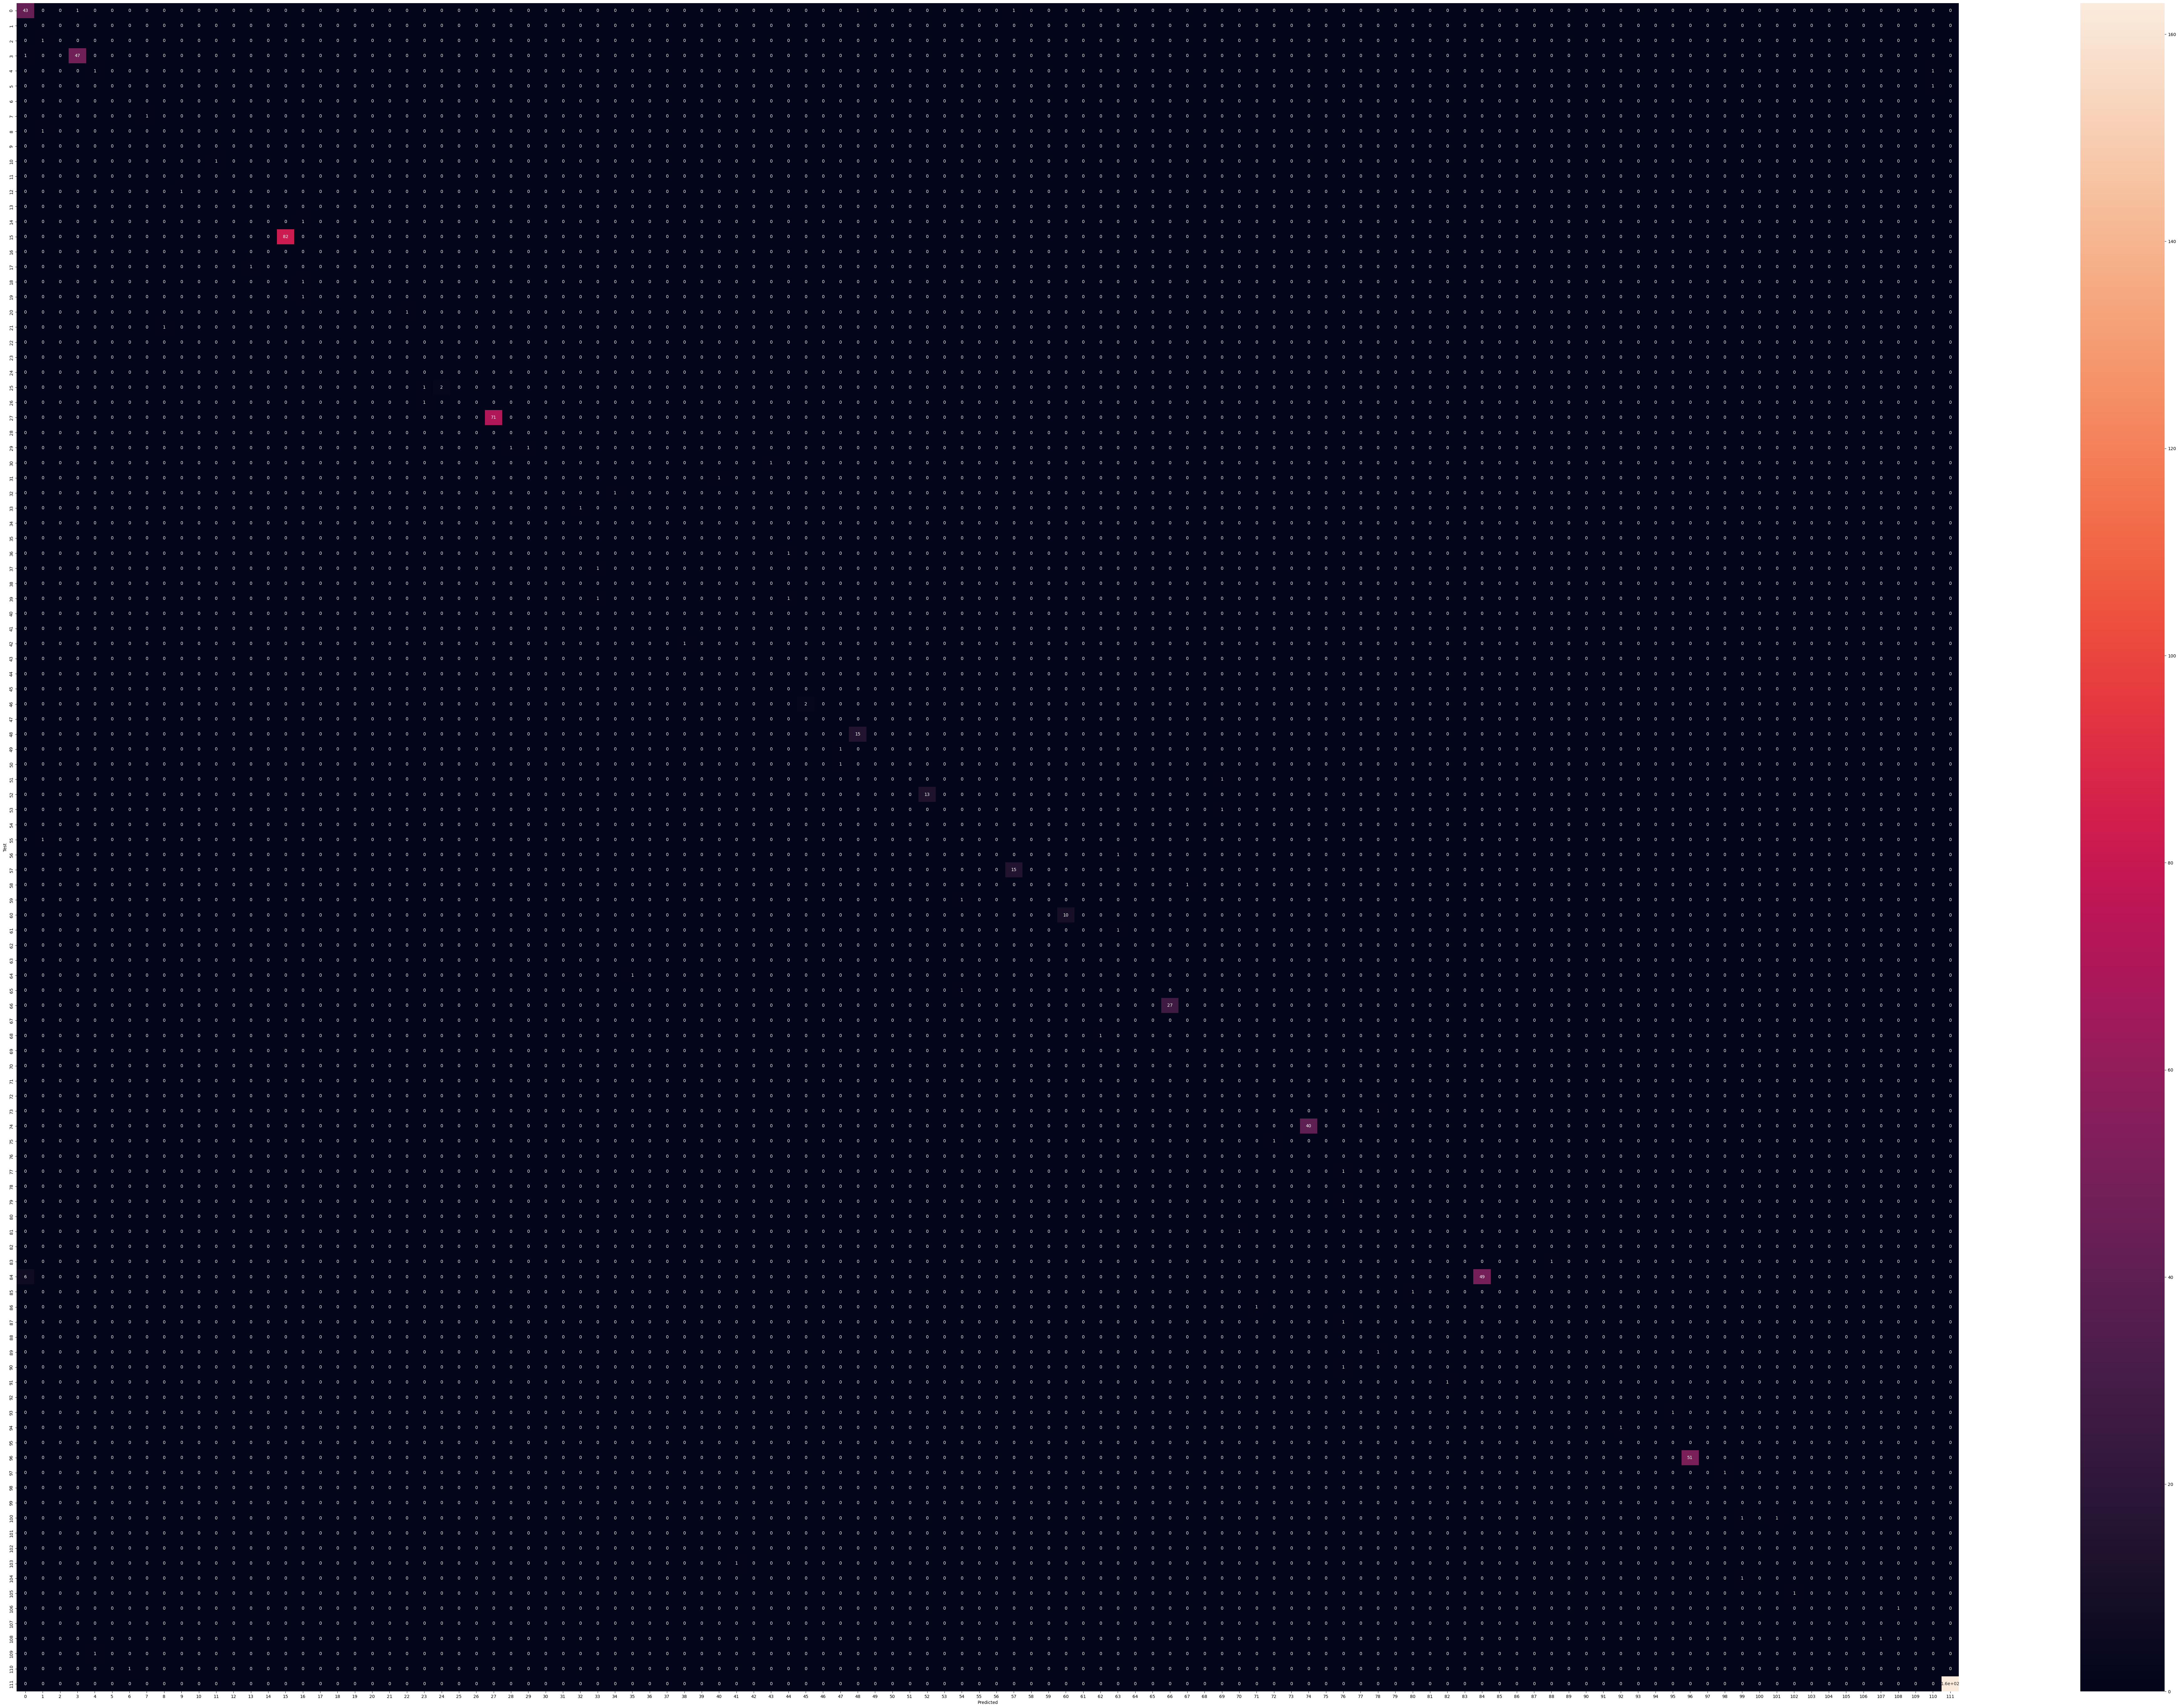

In [658]:
plt.figure(figsize = (100, 70))
sb.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Test")

## Generating the dataset after preprocessing

In [660]:
df['University Rank'] = target
df.head()

,No of student,No of student per staff,International Student,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female Ratio,Male Ratio,...,Location_United Kingdom,Location_United States,Location_Unknown Location,Location_Uruguay,Location_Uzbekistan,Location_Venezuela,Location_Vietnam,Location_Zambia,Location_Zimbabwe,University Rank
0,20965.0,10.6,0.42,92.3,99.7,99.0,74.9,96.2,48.0,52.0,...,1,0,0,0,0,0,0,0,0,1
1,21887.0,9.6,0.25,94.8,99.0,99.3,49.5,80.5,50.0,50.0,...,0,1,0,0,0,0,0,0,0,2
2,20185.0,11.3,0.39,90.9,99.5,97.0,54.2,95.8,47.0,53.0,...,1,0,0,0,0,0,0,0,0,3
3,16164.0,7.1,0.24,94.2,96.7,99.8,65.0,79.8,46.0,54.0,...,0,1,0,0,0,0,0,0,0,3
4,11415.0,8.2,0.33,90.7,93.6,99.8,90.9,89.3,40.0,60.0,...,0,1,0,0,0,0,0,0,0,5


In [661]:
df.to_csv('World University Rankings 2023 Dataset.csv', index=False)